In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv("/content/1_Churn_Modelling.csv")

In [27]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
Geography = pd.get_dummies(dataset['Geography'], drop_first = True).astype(int)
Gender = pd.get_dummies(dataset['Gender'], drop_first = True).astype(int)

In [30]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [31]:
dataset = pd.concat([dataset, Geography, Gender], axis=1)

In [32]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [33]:
dataset.drop(['Geography','Gender'],axis=1,inplace=True)

In [34]:
X=dataset.loc[:,['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Germany', 'Spain', 'Male']]
y=dataset.Exited

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()

In [39]:
model.add(Dense(units=11, input_dim=11, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(units=16, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 16)                192       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model_history = model.fit(X_train, y_train, epochs=15, validation_split=0.33, batch_size=10)

Epoch 1/15
503/503 [==============================] - 3s 7ms/step - loss: 0.4662 - accuracy: 0.7894 - val_loss: 0.4245 - val_accuracy: 0.8110
Epoch 2/15
503/503 [==============================] - 3s 6ms/step - loss: 0.4406 - accuracy: 0.8020 - val_loss: 0.4099 - val_accuracy: 0.8191
Epoch 3/15
503/503 [==============================] - 3s 6ms/step - loss: 0.4262 - accuracy: 0.8097 - val_loss: 0.4015 - val_accuracy: 0.8199
Epoch 4/15
503/503 [==============================] - 2s 4ms/step - loss: 0.4162 - accuracy: 0.8169 - val_loss: 0.3926 - val_accuracy: 0.8328
Epoch 5/15
503/503 [==============================] - 2s 4ms/step - loss: 0.4071 - accuracy: 0.8185 - val_loss: 0.3847 - val_accuracy: 0.8356
Epoch 6/15
503/503 [==============================] - 3s 5ms/step - loss: 0.3990 - accuracy: 0.8209 - val_loss: 0.3781 - val_accuracy: 0.8368
Epoch 7/15
503/503 [==============================] - 2s 5ms/step - loss: 0.3916 - accuracy: 0.8268 - val_loss: 0.3741 - val_accuracy: 0.8445
Epoch 

In [44]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

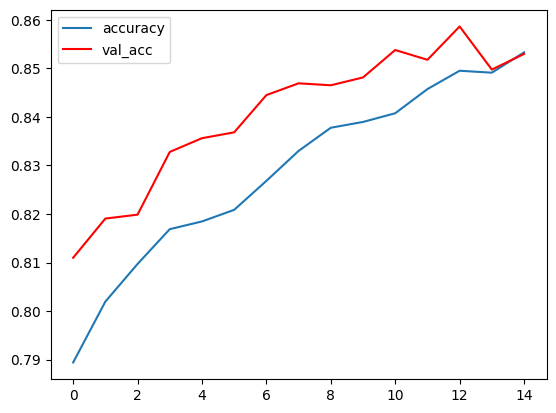

In [47]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='red', label='val_acc')
plt.legend()

In [48]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

79/79 [==============================] - 0s 2ms/step


In [49]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.8608


[0.35650691390037537, 0.86080002784729]

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

79/79 [==============================] - 0s 3ms/step


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1937,   85],
       [ 263,  215]])